# Variability analysis for HBEC IFN experiment

In [81]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from pybedtools import BedTool
import pickle as pkl
%matplotlib inline
import itertools

In [82]:
import sys
sys.path.append('/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.6-py3.8.egg')
sys.path.append('/home/ssm-user/Github/misc-seq/miscseq')
import encode
import memento

In [83]:
data_path = '/data_volume/memento/hbec/'
fig_path = '/data/home/Github/scrna-parameter-estimation/figures/fig6/'

In [84]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [85]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'figure.titlesize':'medium',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)

### Get canonical TFs

In [86]:
tf_df = pd.read_csv('human_tf.txt', sep='\t')
tf_list = tf_df['Symbol'].tolist()

### Read the processed RNA data

Focus on the club and bc/club cells and type I interferons for now.

Encode the timestamps to integers.

In [87]:
# adata_processed = sc.read(data_path + 'HBEC_type_I_processed_deep.h5ad')

In [94]:
adata = sc.read(data_path + 'HBEC_type_I_filtered_counts_deep.h5ad')

In [95]:
adata = adata[:, ~adata.var.index.str.startswith('MT-')].copy()
# adata.obs['cell_type'] = adata.obs['cell_type'].apply(lambda x: x if x != 'basal/club' else 'bc')
# adata.obs['cell_type'] = adata.obs['cell_type'].apply(lambda x: x if x != 'ionocyte/tuft' else 'ion-tuft')

In [96]:
adata.shape

(69958, 36588)

In [97]:
converter = {'basal/club':'BC', 'basal':'B', 'ciliated':'C', 'goblet':'G', 'ionocyte/tuft':'IT', 'neuroendo':'N'}

In [99]:
adata.obs['ct'] = adata.obs['cell_type'].apply(lambda x: converter[x])

### Setup memento

In [100]:
def assign_q(batch):
    
    if batch == 0:
        return 0.387*0.25
    elif batch == 1:
        return 0.392*0.25
    elif batch == 2:
        return 0.436*0.25
    else:
        return 0.417*0.25

In [101]:
adata.obs['q'] = adata.obs['batch'].apply(assign_q)

In [102]:
memento.setup_memento(adata, q_column='q')

Version 0.0.6


### Run 1D HT test

In [59]:
ct = ['ciliated']
tp = '6'
for stim in stims:

    print('starting', ct, tp, stim)

    adata_stim = adata.copy()[
        adata.obs.cell_type.isin(ct) & \
        adata.obs.stim.isin(['control', stim]) & \
        adata.obs.time.isin(['0',tp]), :].copy()
    time_converter={0:0, int(tp):1}
    adata_stim.obs['time_step'] = adata_stim.obs['time'].astype(int).apply(lambda x: time_converter[x])

    memento.create_groups(adata_stim, label_columns=['time_step', 'donor'])
    memento.compute_1d_moments(adata_stim, min_perc_group=.9)

    memento.ht_1d_moments(
        adata_stim, 
        formula_like='1 + time_step',
        treatment_col='time_step', 
        num_boot=10000, 
        verbose=1,
        num_cpus=92,
        resampling='permutation',
        approx=False)

    adata_stim.write('/data_volume/memento/hbec/binary_test_latest/{}_{}_{}.h5ad'.format('-'.join(ct), stim, tp))

starting ['ciliated'] 6 alpha


[Parallel(n_jobs=92)]: Using backend LokyBackend with 92 concurrent workers.
[Parallel(n_jobs=92)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=92)]: Done 266 tasks      | elapsed:    1.9s
[Parallel(n_jobs=92)]: Done 616 tasks      | elapsed:    4.7s
[Parallel(n_jobs=92)]: Done 1066 tasks      | elapsed:    8.0s
[Parallel(n_jobs=92)]: Done 1616 tasks      | elapsed:   11.9s
[Parallel(n_jobs=92)]: Done 2266 tasks      | elapsed:   16.5s
[Parallel(n_jobs=92)]: Done 3016 tasks      | elapsed:   21.8s
[Parallel(n_jobs=92)]: Done 3866 tasks      | elapsed:   28.2s
[Parallel(n_jobs=92)]: Done 4816 tasks      | elapsed:   35.0s
[Parallel(n_jobs=92)]: Done 5866 tasks      | elapsed:   42.9s
[Parallel(n_jobs=92)]: Done 7016 tasks      | elapsed:   51.2s
[Parallel(n_jobs=92)]: Done 8266 tasks      | elapsed:  1.0min
[Parallel(n_jobs=92)]: Done 9224 out of 9224 | elapsed:  1.1min finished
... storing 'memento_group' as categorical


starting ['ciliated'] 6 beta


[Parallel(n_jobs=92)]: Using backend LokyBackend with 92 concurrent workers.
[Parallel(n_jobs=92)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=92)]: Done 266 tasks      | elapsed:    2.1s
[Parallel(n_jobs=92)]: Done 616 tasks      | elapsed:    5.1s
[Parallel(n_jobs=92)]: Done 1066 tasks      | elapsed:    8.6s
[Parallel(n_jobs=92)]: Done 1616 tasks      | elapsed:   12.7s
[Parallel(n_jobs=92)]: Done 2266 tasks      | elapsed:   17.6s
[Parallel(n_jobs=92)]: Done 3016 tasks      | elapsed:   23.3s
[Parallel(n_jobs=92)]: Done 3866 tasks      | elapsed:   30.1s
[Parallel(n_jobs=92)]: Done 4816 tasks      | elapsed:   37.2s
[Parallel(n_jobs=92)]: Done 5866 tasks      | elapsed:   45.4s
[Parallel(n_jobs=92)]: Done 7016 tasks      | elapsed:   54.6s
[Parallel(n_jobs=92)]: Done 8266 tasks      | elapsed:  1.1min
[Parallel(n_jobs=92)]: Done 9667 out of 9667 | elapsed:  1.3min finished
... storing 'memento_group' as categorical


starting ['ciliated'] 6 gamma


[Parallel(n_jobs=92)]: Using backend LokyBackend with 92 concurrent workers.
[Parallel(n_jobs=92)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=92)]: Done 266 tasks      | elapsed:    2.1s
[Parallel(n_jobs=92)]: Done 616 tasks      | elapsed:    4.3s
[Parallel(n_jobs=92)]: Done 1066 tasks      | elapsed:    7.3s
[Parallel(n_jobs=92)]: Done 1616 tasks      | elapsed:   10.9s
[Parallel(n_jobs=92)]: Done 2266 tasks      | elapsed:   15.1s
[Parallel(n_jobs=92)]: Done 3016 tasks      | elapsed:   19.9s
[Parallel(n_jobs=92)]: Done 3866 tasks      | elapsed:   25.7s
[Parallel(n_jobs=92)]: Done 4816 tasks      | elapsed:   31.7s
[Parallel(n_jobs=92)]: Done 5866 tasks      | elapsed:   38.9s
[Parallel(n_jobs=92)]: Done 7016 tasks      | elapsed:   46.5s
[Parallel(n_jobs=92)]: Done 8266 tasks      | elapsed:   54.6s
[Parallel(n_jobs=92)]: Done 9387 out of 9387 | elapsed:  1.1min finished
... storing 'memento_group' as categorical


starting ['ciliated'] 6 lambda


[Parallel(n_jobs=92)]: Using backend LokyBackend with 92 concurrent workers.
[Parallel(n_jobs=92)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=92)]: Done 266 tasks      | elapsed:    2.0s
[Parallel(n_jobs=92)]: Done 616 tasks      | elapsed:    4.5s
[Parallel(n_jobs=92)]: Done 1066 tasks      | elapsed:    7.5s
[Parallel(n_jobs=92)]: Done 1616 tasks      | elapsed:   11.1s
[Parallel(n_jobs=92)]: Done 2266 tasks      | elapsed:   15.3s
[Parallel(n_jobs=92)]: Done 3016 tasks      | elapsed:   20.3s
[Parallel(n_jobs=92)]: Done 3866 tasks      | elapsed:   26.1s
[Parallel(n_jobs=92)]: Done 4816 tasks      | elapsed:   32.2s
[Parallel(n_jobs=92)]: Done 5866 tasks      | elapsed:   39.4s
[Parallel(n_jobs=92)]: Done 7016 tasks      | elapsed:   47.1s
[Parallel(n_jobs=92)]: Done 8266 tasks      | elapsed:   55.4s
[Parallel(n_jobs=92)]: Done 9487 out of 9487 | elapsed:  1.1min finished
... storing 'memento_group' as categorical


### Read 1d HT result comparing to control

In [61]:
cts = [['ciliated']]
tps = [ '6',]
stims = ['alpha', 'beta', 'gamma', 'lambda']

In [62]:
def read_result(ct):
    
    ht_dict = {}
    moments_dict = {}
    
    for stim in stims:
        ht_dict[stim] = {}
        moments_dict[stim] = {}
        for tp in tps: 
            adata_subset = sc.read(data_path + '/binary_test_latest/{}_{}_{}.h5ad'.format('-'.join(ct), stim, tp))
            ht_dict[stim][tp] = memento.get_1d_ht_result(adata_subset)
            ht_dict[stim][tp]['de_fdr'] = memento.util._fdrcorrect(ht_dict[stim][tp]['de_pval'])
            ht_dict[stim][tp]['dv_fdr'] = memento.util._fdrcorrect(ht_dict[stim][tp]['dv_pval'])
            moments_dict[stim][tp] = memento.get_1d_moments(adata_subset, groupby='time_step')
    return ht_dict,moments_dict

In [63]:
all_result = {}
for ct in cts:
    
    key = '-'.join(ct)
    all_result[key] = {}
    
    all_result[key]['ht'], all_result[key]['moments'] = read_result(ct)

In [377]:
stims = ['alpha', 'beta', 'gamma', 'lambda']
ct = 'ciliated'
de_genes  = {}
for stim in stims:
    de_genes[stim] = all_result[ct]['ht'][stim]['6'].query('de_fdr < 0.1 & de_coef > 0.5').gene.tolist()
de_genes['alpha/beta'] = set(de_genes['alpha']) | set(de_genes['beta'])

stims = ['gamma', 'lambda', 'alpha/beta']
    
uniq_de_genes = {}
for stim in stims:
    
    uniq_de_genes[stim] = set(de_genes[stim])
    for other in stims:
        if stim == other: continue
        uniq_de_genes[stim] -= set(de_genes[other])
    print(stim, len(uniq_de_genes[stim]))

shared_de_genes = set()
for stim in stims:
    if len(shared_de_genes) == 0:
        shared_de_genes = set(de_genes[stim])
    else:
        shared_de_genes &= set(de_genes[stim])

all_de_genes = set()
for stim in ['alpha', 'beta', 'gamma', 'lambda']:
    all_de_genes |= set(de_genes[stim])
shared_de_genes_lenient = all_de_genes - shared_de_genes
for stim in ['gamma', 'lambda', 'alpha/beta']:
    shared_de_genes_lenient -= uniq_de_genes[stim]

gamma 53
lambda 21
alpha/beta 389


### Variability of DEGs in control cells

In [348]:
ctrl = adata[(adata.obs.stim=='control') & adata.obs.ct.isin(['B', 'C', 'BC'])].copy().copy()
ctrl.obs['group'] = 1
memento.create_groups(ctrl, label_columns=['ct', 'donor'])
memento.compute_1d_moments(ctrl, min_perc_group=.3)
# memento.ht_1d_moments(
#     wt_subset, 
#     formula_like='1',
#     treatment_col='Inter', 
#     num_boot=10000, 
#     verbose=1,
#     num_cpus=70,
#     resampling='permutation',
#     approx=False)

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.6-py3.8.egg/memento/estimator.py:105: RuntimeWarning: invalid value encountered in log


In [349]:
m_df, v_df = memento.get_1d_moments(ctrl, groupby='ct')

/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.6-py3.8.egg/memento/main.py:523: RuntimeWarning: divide by zero encountered in log
  moment_mean_df[group] = np.log(val[0])
/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.6-py3.8.egg/memento/main.py:550: RuntimeWarning: divide by zero encountered in log
  m = np.log(val[0])
/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.6-py3.8.egg/memento/main.py:562: RuntimeWarning: invalid value encountered in true_divide
  groupby_var[key] /= groupby_var_count[key]


In [550]:
def classify(x):
    
    if x in shared_de_genes:
        return 'shared'
    elif x in shared_de_genes_lenient:
        return 'partially_shared'
    for stim in stims:
        if x in uniq_de_genes[stim]:
            return 'uniq_' + stim
    return 'none-DE'

In [525]:
de_genes = list(shared_de_genes)
class_order = ['none-DE','shared', 'partially_shared' , 'uniq_lambda','uniq_gamma','uniq_alpha/beta', ]
for stim in stims:
    de_genes += uniq_de_genes[stim]
m_df['de'] = m_df['gene'].isin(de_genes)
v_df['de'] = v_df['gene'].isin(de_genes)

m_df['class'] = pd.Categorical(m_df['gene'].apply(classify), categories=class_order, ordered=True)
v_df['class'] = pd.Categorical(v_df['gene'].apply(classify), categories=class_order, ordered=True)
included_de_genes = m_df.query('de').gene.tolist()
filtered_de_genes = [g  for g in de_genes  if g in included_de_genes]

In [406]:
m_df.columns[1:-1]

Index(['ct_C', 'ct_BC', 'ct_B', 'de'], dtype='object')

In [407]:
v_df_melt = v_df.melt(['gene', 'class', 'de'], m_df.columns[1:-2])
m_df_melt = m_df.melt(['gene', 'class', 'de'], m_df.columns[1:-2])

Text(0.5, 0, '')

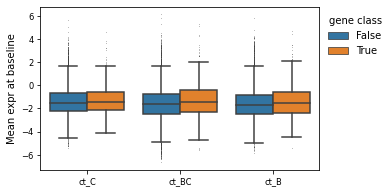

In [408]:
plt.figure(figsize=(5,3))
sns.boxplot(x='variable', y='value', hue='de', data=m_df_melt, fliersize=0.1)
plt.legend(bbox_to_anchor=(1,1), frameon=False, title='gene class'); 
plt.ylabel('Mean expr at baseline'); plt.xlabel(None)
# plt.ylim(-3.5,4)

(-3.5, 4.0)

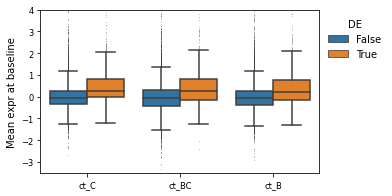

In [411]:
plt.figure(figsize=(5,3))
sns.boxplot(x='variable', y='value', hue='de', data=v_df_melt, fliersize=0.1)
plt.legend(bbox_to_anchor=(1,1), frameon=False, title='DE'); 
plt.ylabel('Mean expr at baseline'); plt.xlabel(None)
plt.ylim(-3.5,4)

Text(0.5, 0, '')

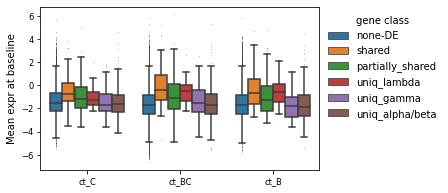

In [402]:
plt.figure(figsize=(5,3))
sns.boxplot(x='variable', y='value', hue='class',data=m_df_melt, fliersize=0.1)
plt.legend(bbox_to_anchor=(1,1), frameon=False, title='gene class'); 
plt.ylabel('Mean expr at baseline'); plt.xlabel(None)
# plt.ylim(-3.5,4)

(-3.5, 4.0)

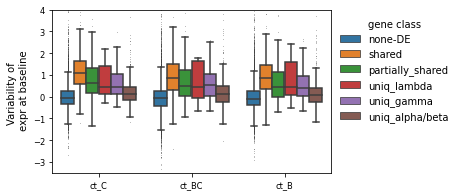

In [403]:
plt.figure(figsize=(5,3))
sns.boxplot(x='variable', y='value', hue='class',data=v_df_melt, fliersize=0.1)
plt.legend(bbox_to_anchor=(1,1), frameon=False, title='gene class'); 
plt.ylabel('Variability of \n expr at baseline'); plt.xlabel(None)
plt.ylim(-3.5,4)

### Heatmap for control correlations

In [529]:
memento.compute_2d_moments(ctrl, gene_pairs=list(itertools.combinations(included_de_genes,2)))
c_df = memento.get_2d_moments(ctrl, groupby='ct')

In [530]:
ct_c_df = c_df[['gene_1', 'gene_2', 'ct_C']]
ct_heatmap = pd.DataFrame(np.zeros((len(included_de_genes), len(included_de_genes))), columns=included_de_genes, index=included_de_genes)
for idx, row in ct_c_df.iterrows():
    
    ct_heatmap.loc[row['gene_1'], row['gene_2']] = row['ct_C']
    ct_heatmap.loc[row['gene_2'], row['gene_1']] = row['ct_C']

In [534]:
print(ct_heatmap.shape)
cg = sns.clustermap(ct_heatmap, center=0, vmax=0.3); plt.close()
row_inds = cg.dendrogram_row.reordered_ind
col_inds = cg.dendrogram_col.reordered_ind
print(ct_heatmap.shape)


(575, 575)
(575, 575)


In [535]:
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [549]:
def classify_color(x):
    
    if x in shared_de_genes:
        return -1
    for idx, stim in enumerate(stims):
        if x in uniq_de_genes[stim]:
            return idx
    return 'impossible'

In [537]:
class_list = np.array([classify(g) for g in included_de_genes])[:, np.newaxis]

In [557]:
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [578]:
from matplotlib.colors import LinearSegmentedColormap


myColors = sns.color_palette('husl')[:4]
class_list = np.array([classify_color(g) for g in included_de_genes])[np.newaxis, :]
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

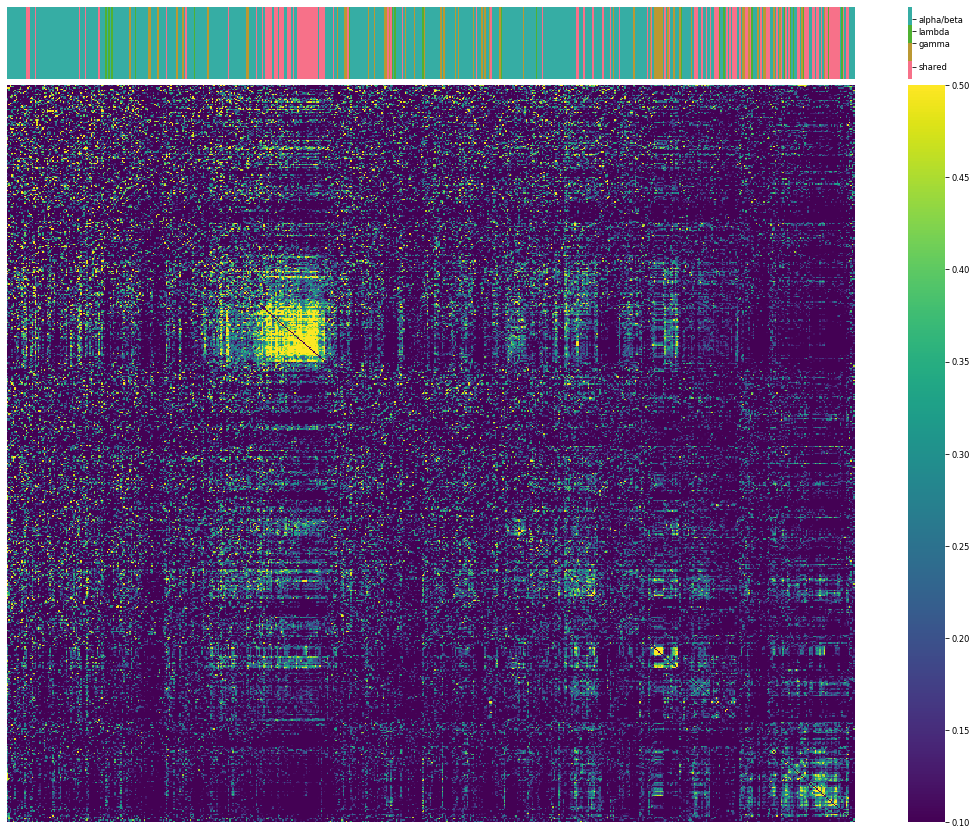

In [591]:
fig = plt.figure(figsize=(20,15))
ax1 = plt.subplot2grid((21,20), (2,0), colspan=19, rowspan=19)
ax2 = plt.subplot2grid((21,20), (0,0), colspan=19, rowspan=2)

sns.heatmap(ct_heatmap.iloc[row_inds, col_inds], cmap='viridis', vmax=0.5, vmin=0.1, ax=ax1, yticklabels=False, xticklabels=False, )
sns.heatmap(class_list[:, row_inds], cmap=cmap, ax=ax2, yticklabels=False, xticklabels=False,)
colorbar = ax2.collections[0].colorbar
colorbar.set_ticks([-0.5, 0.5, 1, 1.5])
colorbar.set_ticklabels(['shared', 'gamma', 'lambda', 'alpha/beta'])

<AxesSubplot:>

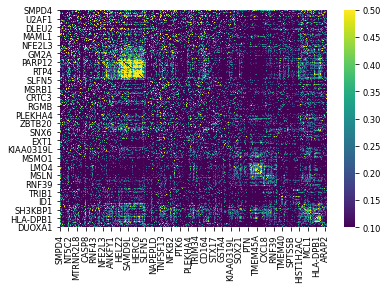

In [469]:
sns.heatmap(ct_heatmap.iloc[row_inds, col_inds], cmap='viridis', vmax=0.5, vmin=0.1)

In [162]:
def draw_lines(x1, x2):
    
    plt.plot([x1, x1], [0, len(col_inds)], color='green', lw=2)
    plt.plot([0, len(col_inds)], [x1, x1], color='green', lw=2)

    plt.plot([x2, x2], [0, len(col_inds)], color='red', lw=2)
    plt.plot([0, len(col_inds)], [x2, x2], color='red', lw=2)

In [165]:
stims

['gamma', 'lambda', 'alpha/beta']

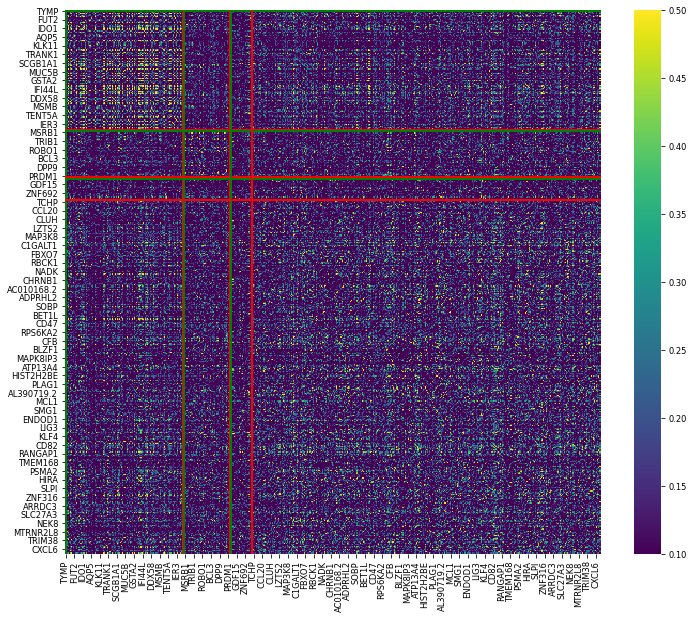

In [167]:
plt.figure(figsize=(12,10))
# sns.heatmap(ct_heatmap.iloc[row_inds, col_inds], center=0, vmax=0.3)
sns.heatmap(ct_heatmap.loc[filtered_de_genes, filtered_de_genes], cmap='viridis', vmax=0.5, vmin=0.1)

draw_lines(1, len([g for g in shared_de_genes if g in filtered_de_genes]))

x = len([g for g in shared_de_genes if g in filtered_de_genes])
draw_lines(x+1, 
           x+len([g for g in uniq_de_genes['gamma'] if g in filtered_de_genes])
          )

x = x+len([g for g in uniq_de_genes['gamma'] if g in filtered_de_genes])
draw_lines(x+1, 
           x+len([g for g in uniq_de_genes['lambda'] if g in filtered_de_genes])
          )

### Visualize on UMAP

In [444]:
'CXCL3' in shared_de_genes

True

In [445]:
'CXCL8' in shared_de_genes

True

In [452]:
v_df[['gene', 'ct_C']].rename(columns={'gene':'gene_1', 'ct_C':'v1'})

,gene_1,v1
0,LINC01409,0.096451
1,FAM41C,-0.157768


In [455]:
viz_df = c_df.copy()
viz_df['shared_1'] = viz_df['gene_1'].isin(shared_de_genes)
viz_df['shared_2'] = viz_df['gene_2'].isin(shared_de_genes)
viz_df = viz_df.merge(v_df[['gene', 'ct_C']].rename(columns={'gene':'gene_1', 'ct_C':'v1'}), on='gene_1', how='left')
viz_df = viz_df.merge(v_df[['gene', 'ct_C']].rename(columns={'gene':'gene_2', 'ct_C':'v2'}), on='gene_2', how='left')
viz_df['var_sum'] = viz_df['v1'] + viz_df['v2']

In [461]:
viz_df.query('shared_1 & shared_2 & ct_C > 0.4').sort_values('var_sum', ascending=False).head(50)

,gene_1,gene_2,ct_C,ct_BC,ct_B,ct_G,ct_IT,ct_N,shared_1,shared_2,v1,v2,var_sum
98885,MUC5B,TFF3,0.508513,0.452814,0.386308,NaN,NaN,NaN,True,True,3.274730,3.761840,7.036570
93644,MSMB,MUC5B,0.610184,0.524731,0.383016,NaN,NaN,NaN,True,True,3.414991,3.274730,6.689721
52480,CXCL8,CXCL3,0.515100,0.392155,0.297758,NaN,NaN,NaN,True,True,2.353311,3.288343,5.641655
102396,SCGB1A1,CYP2F1,0.534167,0.323455,0.289343,NaN,NaN,NaN,True,True,3.872641,1.745145,5.617786
106997,KRT6A,KRT17,0.516184,0.430133,0.529123,NaN,NaN,NaN,True,True,3.110438,2.331640,5.442078
93824,MSMB,KLK11,0.531602,0.459411,0.321196,NaN,NaN,NaN,True,True,3.414991,1.930092,5.345082
106914,KRT6A,KRT5,0.648524,0.683257,0.671295,NaN,NaN,NaN,True,True,3.110438,2.192771,5.303209
98864,MUC5B,KLK11,0.434366,0.293009,0.189265,NaN,NaN,NaN,True,True,3.274730,1.930092,5.204822
512,ISG15,IFI6,0.549766,0.511125,0.519174,NaN,0.825593,NaN,True,True,2.354911,2.409261,4.764173
751,ISG15,IFIT2,0.563469,0.446143,0.414709,NaN,0.967807,NaN,True,True,2.354911,2.366819,4.721730


In [413]:
adata_processed = sc.read(data_path + 'HBEC_type_I_processed_deep.h5ad')

In [417]:
adata_processed.obs['ct'] = adata_processed.obs['cell_type'].apply(lambda x: converter[x])

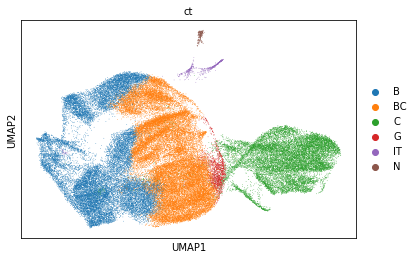

In [459]:
sc.pl.umap(adata_processed, color='ct')

### Find TFs that govern those genes

In [258]:
def get_top_tfs(gene_list, plot=False):
    tf_ctrl = adata[
        (adata.obs.stim=='control') & adata.obs.ct.isin(['B', 'C', 'BC'])
    ].copy().copy()
    tf_ctrl.obs['group'] = 1
    memento.create_groups(tf_ctrl, label_columns=['ct', 'donor'])
    memento.compute_1d_moments(tf_ctrl, min_perc_group=.3)
    available_tfs = list(set(tf_list) & set(tf_ctrl.var.index))
    available_targets = list(gene_list & set(tf_ctrl.var.index))

    memento.compute_2d_moments(tf_ctrl, gene_pairs=list(itertools.product(available_tfs, available_targets)))
    moment_df = memento.get_2d_moments(tf_ctrl, groupby='ct')
    moment_df['mag_ct_C'] = moment_df['ct_C'].abs()
    top_tfs = moment_df.groupby('gene_1')['ct_C'].mean().sort_values(ascending=False).head(10).index.tolist()
    top_tf_df = moment_df.query('gene_1 in @top_tfs').copy()
    top_tf_df['gene_1'] = pd.Categorical(top_tf_df['gene_1'].values, categories=top_tfs, ordered=True)
    if plot:
        sns.barplot(x='gene_1', y='ct_C', data=top_tf_df)
    return moment_df, top_tfs

In [260]:
shared_df, top_tfs = get_top_tfs(shared_de_genes)
lambda_df, _ = get_top_tfs(uniq_de_genes['lambda'])
gamma_df, _ = get_top_tfs(uniq_de_genes['gamma'])
type1_df, _ = get_top_tfs(uniq_de_genes['alpha/beta'])

/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.6-py3.8.egg/memento/main.py:614: RuntimeWarning: invalid value encountered in true_divide
  groupby_corr[key] /= groupby_corr_count[key]


In [289]:
shared_df['type'] = 'shared ISGs'
lambda_df['type'] = 'lambda uniq. ISGs'
gamma_df['type'] = 'gamma uniq. ISGs'
type1_df['type'] = 'alpha/beta uniq. ISGs'

In [290]:
combined_df = pd.concat([shared_df, type1_df, gamma_df, lambda_df])
order = shared_df.groupby('gene_1')['ct_C'].mean().sort_values(ascending=False).head(10).index.tolist()
filtered_df = combined_df.query('gene_1 in @order').copy()
filtered_df['gene_1'] = pd.Categorical(filtered_df['gene_1'].values, categories=order, ordered=True)

(0.0, 0.35)

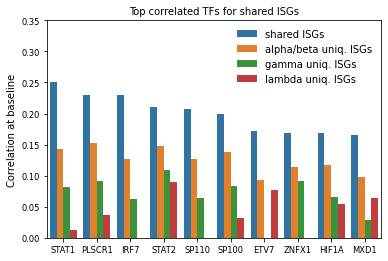

In [291]:
sns.barplot(x='gene_1', y='ct_C', data=filtered_df, hue='type', errwidth=0)
plt.ylabel('Correlation at baseline'); plt.xlabel(None); plt.legend(frameon=False)
plt.title('Top correlated TFs for shared ISGs')
plt.ylim(0, 0.35)

In [208]:
tf_ctrl = adata[
    (adata.obs.stim=='control') & adata.obs.ct.isin(['B', 'C', 'BC'])
].copy().copy()
tf_ctrl.obs['group'] = 1
memento.create_groups(tf_ctrl, label_columns=['ct', 'donor'])
memento.compute_1d_moments(tf_ctrl, min_perc_group=.3)
available_tfs = list(set(tf_list) & set(tf_ctrl.var.index))
available_targets = list(shared_de_genes & set(tf_ctrl.var.index))

memento.compute_2d_moments(tf_ctrl, gene_pairs=list(itertools.product(available_tfs, available_targets)))


/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.6-py3.8.egg/memento/estimator.py:105: RuntimeWarning: invalid value encountered in log


In [209]:
moment_df = memento.get_2d_moments(tf_ctrl, groupby='ct')
moment_df['mag_ct_C'] = moment_df['ct_C'].abs()

In [245]:
top_tfs = moment_df.groupby('gene_1')['ct_C'].mean().sort_values(ascending=False).head(10).index.tolist()

In [247]:
top_tf_df = moment_df.query('gene_1 in @top_tfs').copy()
top_tf_df['gene_1'] = pd.Categorical(top_tf_df['gene_1'].values, categories=top_tfs, ordered=True)

<AxesSubplot:xlabel='gene_1', ylabel='ct_C'>

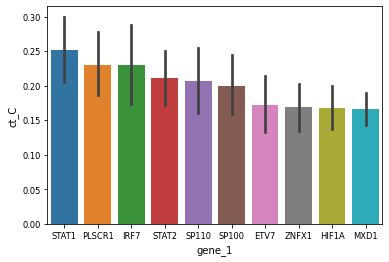

In [248]:
sns.barplot(x='gene_1', y='ct_C', data=top_tf_df)

In [371]:
stims = ['alpha', 'beta', 'gamma', 'lambda']
ct = 'ciliated'
de_genes = {}
for stim in stims:
    de_genes[stim] = all_result[ct]['ht'][stim]['6'].query('de_fdr < 0.1 & de_coef > 0.5').gene.tolist()
de_genes['alpha/beta'] = set(de_genes['alpha']) | set(de_genes['beta'])

In [375]:
for g in de_genes['alpha']:
    if 'HLA' in g:
        print(g)

HLA-F
HLA-A
HLA-E
HLA-C
HLA-B
HLA-DQB1


In [373]:
for g in de_genes['gamma']:
    if 'HLA' in g:
        print(g)

HLA-F
HLA-A
HLA-E
HLA-C
HLA-B
HLA-DRA
HLA-DRB1
HLA-DQB1
HLA-DMB
HLA-DMA
HLA-DPA1
HLA-DPB1


### Differential correlation upon stimulation

In [294]:
ct = ['ciliated']
stim = 'gamma'

In [340]:
adata_stim = adata.copy()[
    adata.obs.cell_type.isin(ct) & \
    adata.obs.stim.isin(['control', stim])].copy()
# time_converter={0:0, int('6'):1}
adata_stim.obs['time_step'] = adata_stim.obs['time']#.astype(int).apply(lambda x: time_converter[x])
adata_stim.obs['time'] = 'tp_' + adata_stim.obs['time'].astype(str)

memento.create_groups(adata_stim, label_columns=['time', 'donor'])
memento.compute_1d_moments(adata_stim, min_perc_group=.3)
moment_1d_df = memento.get_1d_moments(adata_stim, groupby='time')

available_tfs = list(set(tf_list) & set(moment_1d_df[0].gene))
available_targets = list(uniq_de_genes[stim] & set(moment_1d_df[0].gene))

memento.compute_2d_moments(adata_stim, list(itertools.product(available_tfs, available_targets)))

moment_df = memento.get_2d_moments(adata_stim, groupby='time')

moment_df['max_corr'] = moment_df.iloc[:, 2:].max(axis=1).values

candidates = moment_df.query('max_corr > 0.35 & gene_1 != gene_2')

top_tfs = candidates.groupby('gene_1').size().sort_values(ascending=False)
top_tfs = top_tfs[top_tfs > 15].index.tolist()

candidates = candidates.query('gene_1 in @top_tfs')

candidates = list(zip(candidates['gene_1'], candidates['gene_2']))

memento.compute_2d_moments(adata_stim, candidates)

memento.ht_2d_moments( 
    adata_stim, 
    formula_like='1 + time + donor',
    treatment_col='time', 
    num_boot=10000, 
    verbose=1,
    num_cpus=94,
    resampling='permutation',
    approx=False)
    

/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.6-py3.8.egg/memento/estimator.py:105: RuntimeWarning: invalid value encountered in log
/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.6-py3.8.egg/memento/main.py:523: RuntimeWarning: divide by zero encountered in log
  moment_mean_df[group] = np.log(val[0])
/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.6-py3.8.egg/memento/main.py:550: RuntimeWarning: divide by zero encountered in log
  m = np.log(val[0])
/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.6-py3.8.egg/memento/main.py:562: RuntimeWarning: invalid value encountered in true_divide
  groupby_var[key] /= groupby_var_count[key]
/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.6-py3.8.egg/memento/main.py:614: RuntimeWarning: invalid value encountered in true_divide
  groupby_corr[key] /= groupby_corr_count[key]


KeyboardInterrupt: 

In [330]:
ht_2d_df = memento.get_2d_ht_result(adata_stim)
ht_2d_df['corr_fdr'] = memento.util._fdrcorrect(ht_2d_df['corr_pval'])

<AxesSubplot:xlabel='corr_coef', ylabel='Density'>

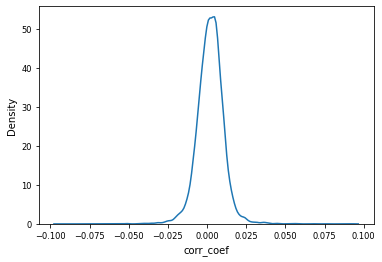

In [338]:
sns.kdeplot(ht_2d_df['corr_coef'])

In [337]:
ht_2d_df.sort_values('corr_coef', ascending=False)

,gene_1,gene_2,corr_coef,corr_se,corr_pval,corr_fdr
3989,RREB1,RMND5B,0.092485,0.025008,0.000664,0.141265
9476,ZNF7,DPP9,0.075608,0.036232,0.033297,0.282803
7655,ZNF441,RMND5B,0.067859,0.024299,0.004600,0.157298
4692,SOX13,SSH3,0.057950,0.024588,0.017598,0.232096
9135,PAX9,ARHGAP8,0.055874,0.029873,0.061694,0.349136
...,...,...,...,...,...,...
2829,ZNF429,ERAP1,-0.051784,0.031532,0.100890,0.417632
5751,ZNF205,RMND5B,-0.060066,0.052905,0.267373,0.606641
8048,FOXK1,RMND5B,-0.069596,0.031026,0.023798,0.252343
8383,ZXDC,RMND5B,-0.078414,0.040122,0.047595,0.315307


In [336]:
ht_2d_df.query('corr_fdr < 0.2')

,gene_1,gene_2,corr_coef,corr_se,corr_pval,corr_fdr
61,KLF5,PLAAT4,0.005829,0.001383,0.000991,0.141265
70,KLF5,IGFBP5,0.004306,0.001533,0.005299,0.163382
77,KLF5,PDIA3,0.004274,0.001581,0.008699,0.189546
79,KLF5,AC104825.1,0.009761,0.002572,0.002006,0.141265
80,KLF5,RBMS3,0.013011,0.003589,0.002818,0.141265
...,...,...,...,...,...,...
10275,ZFP64,RBMS3,0.020189,0.007754,0.010099,0.195689
10276,ZFP64,ERAP1,-0.037280,0.014187,0.006799,0.175121
10286,ZNF814,NAPEPLD,0.016589,0.006608,0.010299,0.197065
10295,ZNF814,RAPH1,0.014764,0.005634,0.010899,0.199228


In [335]:
ht_2d_df.corr_fdr.min()

0.14126511877114173

(array([1218.,  701.,  563.,  493.,  466.,  386.,  394.,  323.,  358.,
         367.,  308.,  315.,  264.,  290.,  295.,  266.,  249.,  240.,
         236.,  239.,  228.,  249.,  263.,  229.,  214.,  248.,  224.,
         245.,  249.,  208.]),
 array([2.43045522e-04, 3.35682773e-02, 6.68935092e-02, 1.00218741e-01,
        1.33543973e-01, 1.66869205e-01, 2.00194436e-01, 2.33519668e-01,
        2.66844900e-01, 3.00170132e-01, 3.33495364e-01, 3.66820595e-01,
        4.00145827e-01, 4.33471059e-01, 4.66796291e-01, 5.00121523e-01,
        5.33446755e-01, 5.66771986e-01, 6.00097218e-01, 6.33422450e-01,
        6.66747682e-01, 7.00072914e-01, 7.33398145e-01, 7.66723377e-01,
        8.00048609e-01, 8.33373841e-01, 8.66699073e-01, 9.00024305e-01,
        9.33349536e-01, 9.66674768e-01, 1.00000000e+00]),
 <BarContainer object of 30 artists>)

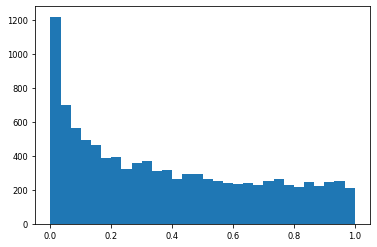

In [334]:
plt.hist(ht_2d_df['corr_pval'], bins=30)

In [328]:
ht_2d_df.head(5)

,gene_1,gene_2,corr_coef,corr_se,corr_pval
0,CARF,SCML1,0.011724,0.006663,0.080892
1,CARF,SSH3,0.015479,0.007177,0.031297
2,CARF,UHMK1,-0.001589,0.005484,0.768223
3,CARF,ARHGAP8,-0.006281,0.006963,0.369963
4,CARF,SLFN11,-0.004839,0.006323,0.442556


In [325]:
candidates.shape

(6374, 9)

In [303]:
high_corr_df.shape

(17848, 9)

In [318]:
'STAT2' in moment_df.gene_1.values

True

In [177]:
moment_df['max_corr'] = moment_df.iloc[:, 2:].max(axis=1).values

In [ ]:
def get_2d_ht(tf, ct, stim):
    
    adata_stim = adata.copy()[
        adata.obs.cell_type.isin(ct) & \
        adata.obs.time.isin(['0', '6']) & \
        adata.obs.stim.isin(['control', stim])].copy()
    time_converter={0:0, int('6'):1}
    adata_stim.obs['time_step'] = adata_stim.obs['time'].astype(int).apply(lambda x: time_converter[x])

    memento.create_groups(adata_stim, label_columns=['time', 'donor'])
    memento.compute_1d_moments(adata_stim, min_perc_group=.9)
    moment_1d_df = memento.get_1d_moments(adata_stim, groupby='time')
    
    available_tfs = list(set(filtered_tfs) & set(moment_1d_df[0].gene))
    
    memento.compute_2d_moments(adata_stim, list(itertools.product(available_tfs, adata_stim.var.index)))
    
    moment_df = memento.get_2d_moments(adata_stim, groupby='time')
    
    candidates = moment_df.query('time_0 > 0.35 | time_6 > 0.35')
    candidates = list(zip(candidates['gene_1'], candidates['gene_2']))
    
    adata_stim = adata.copy()[
        adata.obs.cell_type.isin(ct) & \
        adata.obs.time.isin(['0', '6']) & \
        adata.obs.stim.isin(['control', stim])].copy()
    
    adata_stim.obs['time_step'] = adata_stim.obs['time'].astype(int).apply(lambda x: time_converter[x])

    memento.create_groups(adata_stim, label_columns=['time_step', 'donor'])
    memento.compute_1d_moments(adata_stim, min_perc_group=.9)
    memento.compute_2d_moments(adata_stim, candidates)
    
    memento.ht_2d_moments( 
        adata_stim, 
        formula_like='1 + time_step',
        cov_column='time_step', 
        num_boot=10000, 
        verbose=1,
        num_cpus=13)
    
    
    ht_df = memento.get_2d_ht_result(adata_stim)